In [33]:
import pandas as pd

users_info = pd.read_csv('all_user_information_with_genre.csv.zip', compression='zip', index_col=0)
print(users_info.head())
print(users_info.columns)

C:\Users\danny\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
                     user_id         artist  ... speechiness    tempo
0  4ura3429lz6lq6xs5itaoqiyi           K/DA  ...      0.0872  170.036
1  4ura3429lz6lq6xs5itaoqiyi          TWICE  ...      0.0603  128.983
2  4ura3429lz6lq6xs5itaoqiyi        HINAPIA  ...      0.0626   89.994
3  4ura3429lz6lq6xs5itaoqiyi           ITZY  ...      0.0665  124.998
4  4ura3429lz6lq6xs5itaoqiyi  Billie Eilish  ...      0.0482  120.033

[5 rows x 11 columns]
Index(['user_id', 'artist', 'genre', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness',
       'tempo'],
      dtype='object')


In [34]:
# drop the empty columns
import numpy as np
users_info.dropna(inplace=True)
print('length of data after NaN removal',len(users_info))
print('Number of unique genres: ',len(set(users_info['genre'])))

length of data after NaN removal 893909
Number of unique genres:  4463


In [35]:
# remove quotations at the ends of the string
cols = list(users_info.columns)
col = cols.index('genre')
count = 0
for i in range(len(users_info)):
    b = False
    if(users_info.iloc[i,col][0] == '\"' or users_info.iloc[i,col][0] == "\'"): #single or double quote
        users_info.iloc[i,col] = users_info.iloc[i,col][1:]
        b = True
    if(users_info.iloc[i,col][-1] == '\"' or users_info.iloc[i,col][-1] == "\'"):
        users_info.iloc[i,col] = users_info.iloc[i,col][:-1]
        b = True
    count = (count + 1) if(b) else count
print('Number of modified rows: ', count)

Number of modified rows:  731288


length of users_info before:  893909
unique genres before removal:  3115
-----------------------------
unique genres after key removal:  750
length of users_info after:  840827


<AxesSubplot:>

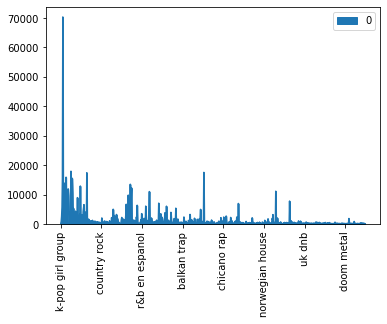

In [37]:
from collections import Counter

a = list(users_info['genre'].copy())
letter_counts = Counter(a)
print('length of users_info before: ',len(users_info))
print('unique genres before removal: ',len(list(letter_counts)))
delete = []
for key in letter_counts:
    if(letter_counts[key] < 100):
        delete.append(key)
for key in delete:
    del letter_counts[key]
print('-----------------------------')
print('unique genres after key removal: ',len(list(letter_counts)))
print('length of users_info after: ',sum(letter_counts.values()))
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='area',rot=90)

In [36]:
users_info.to_csv('postprocessed_user_info_with_genre.csv.zip', compression='zip')